## Choropleth Data Visualization
### 2020-08-01
### Christopher Kramer

Using free and open source tools, provide a set of choropleth visualizations for each of
the columns containing dates such that the resulting visualizations (48 states only) tell
the story by conveying through color, texture, or both the time lines of achievement of
each milestone/column in the provided dataset. Missing data are of particular interest in
that when a state has never achieved a given milestone, that should be indicated in a
standout manner such as cross-hatching. Consider that the publication may be
grayscale. Provide a solution for that as well. Provide the titles, labels, and legends
necessary for clarification. File support is given as follows: SturmCodebook has the
explanation. SturmData is the data CSV.

#### EDA

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('SturmData_csv.txt')

In [3]:
data.head()

state  fips  icpsr  debtfree  effectivemwpa  earnings   wills  soletrader
0    AL     1     41    1846.0            NaN    1887.0     NaN         NaN
1    AR     5     42    1835.0         1873.0    1873.0  1868.0      1868.0
2    AZ     4     61    1864.0         1871.0    1973.0     NaN      1871.0
3    CA     6     71    1850.0         1872.0    1872.0  1874.0      1872.0
4    CO     8     62    1861.0         1861.0    1861.0  1874.0      1874.0

In [4]:
data.describe()

fips      icpsr     debtfree  effectivemwpa     earnings  \
count  48.000000  48.000000    47.000000      47.000000    44.000000   
mean   30.187500  38.895833  1856.319149    1874.893617  1881.000000   
std    15.448826  21.539908    12.946556      19.141616    23.673162   
min     1.000000   1.000000  1835.000000    1848.000000  1842.000000   
25%    18.750000  22.750000  1846.000000    1861.000000  1869.000000   
50%    30.500000  41.500000  1852.000000    1873.000000  1873.000000   
75%    42.500000  54.500000  1864.500000    1879.500000  1888.000000   
max    56.000000  73.000000  1890.000000    1943.000000  1973.000000   

             wills   soletrader  
count    32.000000    31.000000  
mean   1864.468750  1874.483871  
std      21.983842    10.614050  
min    1808.000000  1844.000000  
25%    1853.750000  1870.500000  
50%    1868.500000  1874.000000  
75%    1877.750000  1878.500000  
max    1897.000000  1895.000000

#### You don't need this package to grade the assignment, but I'd recommend installing it, it's really handy

In [5]:
from pandas_profiling import ProfileReport

#### If you're getting an error from the pandas_profiling import statement (after successfully installing), run the following command:

In [6]:
#import sys
#!{sys.executable} -m pip install -U --pre pandas-profiling

#### ...and restart the kernal

In [7]:
ProfileReport(data).to_notebook_iframe()

The wills and soletrader variables have the most missing values. There seems to be a number of correlary interactions between the variables (excluding categorical; state code, etc.), but this is to be expected given that states enacting one legal standard are likely to enact similar standards at the same time, or over time. That is, states doing one liberal thing are likely to do other liberal things.

### Interactive Maps

In [8]:
import folium
from itertools import repeat
import json

In [10]:
choropleth_config = [
    ['DebtSeparation',"Womens Right to Separate from Husband Debt",'debtfree'],
    ['PropertyControl',"Womens Right to Property", 'effectivemwpa'],
    ['WageOwnership',"Womens Right to Wage Ownership",'earnings'],
    ['WillRights','Womens Right to Own/Separate Legal Will','wills'],
    ['BusinessRights','Womens Right to Sole Contractual/Business Engagement','soletrader']
]





def choropleth_maker(fol_map, config_packet):
    return fol_map.choropleth(
             geo_data='https://raw.githubusercontent.com/shawnbot/topogram/master/data/us-states.geojson',
             name=config_packet[0],
             data=data,
             columns=['state', config_packet[2]],
             key_on='feature.properties.postal',
             fill_color='YlOrRd',
             fill_opacity=0.7,
             line_opacity=0.2,
             legend_name=config_packet[1],
             show=False
            )

In [11]:
m = folium.Map(location=[40, -102], zoom_start=4.25, tiles='https://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Light_Gray_Base/MapServer/tile/{z}/{y}/{x}', attr='Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ')


# setting up default
m.choropleth(
 geo_data='https://raw.githubusercontent.com/shawnbot/topogram/master/data/us-states.geojson',
 name='DebtSeparation',
 data=data,
 columns=['state', 'debtfree'],
 key_on='feature.properties.postal',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Year of Debt Separation Law',
 show=True
)

list(map(choropleth_maker, repeat(m), choropleth_config[1:]))

for key in m._children:
    if key.startswith('color_map'):
        del(m._children[key])

folium.LayerControl().add_to(m)


c:\users\kitthekat\appdata\local\programs\python\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [118]:
m

### Static Maps

In [17]:
import geopandas as gpd
import json
import contextily as ctx

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from mpl_toolkits.axes_grid1 import make_axes_locatable

from shapely.geometry import shape

In [18]:
data.head()

state  fips  icpsr  debtfree  effectivemwpa  earnings   wills  soletrader
0    AL     1     41    1846.0            NaN    1887.0     NaN         NaN
1    AR     5     42    1835.0         1873.0    1873.0  1868.0      1868.0
2    AZ     4     61    1864.0         1871.0    1973.0     NaN      1871.0
3    CA     6     71    1850.0         1872.0    1872.0  1874.0      1872.0
4    CO     8     62    1861.0         1861.0    1861.0  1874.0      1874.0

In [19]:
# Using a different polygon file since it had an easier linking on state abbreviation
geo_data = gpd.read_file('natural-earth-us-states-provinces-1110m.csv').rename(columns={'postal':'state'})

In [20]:
geo_data['Geo Shape'] = geo_data['Geo Shape'].apply(json.loads)

In [21]:
geo_data['Geo Shape'] = geo_data['Geo Shape'].apply(shape)

In [22]:
geo_data = geo_data.set_geometry('Geo Shape')

In [23]:
geo_data = geo_data[['Geo Shape', 'state']].rename(columns={'Geo Shape':'geometry'})

In [24]:
geo_data = gpd.GeoDataFrame(geo_data.merge(data, on='state'))

In [25]:
geo_data.head()

geometry state  fips  icpsr  \
0  POLYGON ((-111.06719 44.54160, -111.07141 45.0...    WY    56     68   
1  POLYGON ((-86.48156 45.32318, -86.26460 45.226...    WI    55     25   
2  POLYGON ((-89.21767 29.29108, -89.40839 29.159...    LA    22     45   
3  POLYGON ((-116.99807 46.33017, -116.90653 46.1...    WA    53     73   
4  POLYGON ((-89.59941 48.01027, -89.48888 48.013...    MN    27     33   

   debtfree  effectivemwpa  earnings   wills  soletrader  
0    1869.0         1869.0    1869.0  1869.0      1869.0  
1    1850.0         1850.0    1872.0     NaN         NaN  
2       NaN         1916.0    1928.0     NaN      1894.0  
3    1860.0         1881.0    1881.0  1889.0      1889.0  
4    1866.0         1869.0    1869.0  1869.0      1874.0

In [30]:
choropleth_config = [
    ["DebtSeparation","Womens' Right to Separate Debt from Husband's (Passing Year of Law)","debtfree"],
    ["PropertyControl","Womens' Right to Separate Control/Management of Property (Passing Year of Law)","effectivemwpa"],
    ["WageOwnership","Womens' Right to Wage Ownership (Passing Year of Law)","earnings"],
    ["WillRights","Womens' Right to Legal Will Without Consent (Passing Year of Law)","wills"],
    ["BusinessRights","Womens' Right to Engage in Contract/Business without Consent (Passing Year of Law)","soletrader"]
]

def map_maker(info_packet):
    font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'light',
        'size': 18,
        'ha': 'left',
        'fontname': 'Verdana'
        }

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18.5, 10.5)
    fig.patch.set_visible(False)
    ax.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    geo_data.plot(column=info_packet[2], ax=ax, legend=True, cax=cax, cmap='OrRd', edgecolor='white', missing_kwds={
             "color": "white",
             "edgecolor": "darkgrey",
             "hatch": "///",
             "label": "Missing values",
    })


    plt.title(info_packet[1], fontdict=font, loc='right', x=-19.5, y=.98)

[None, None, None, None, None]

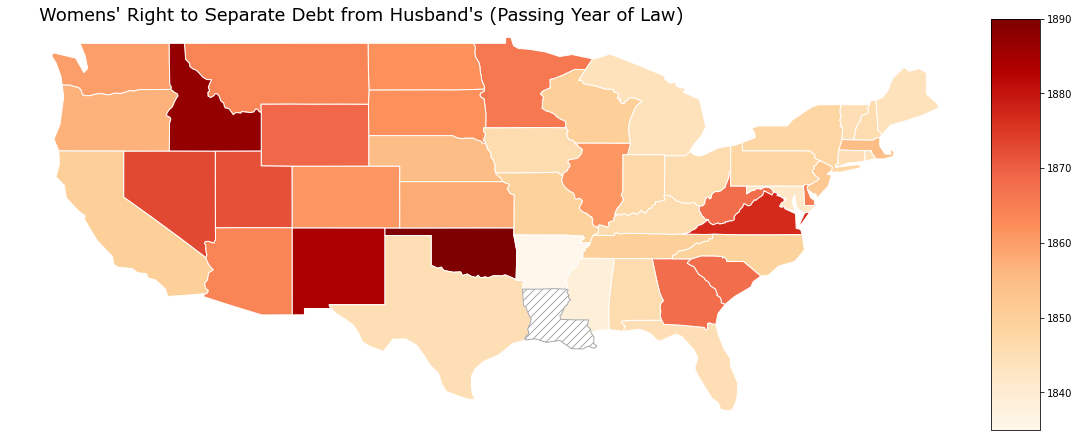

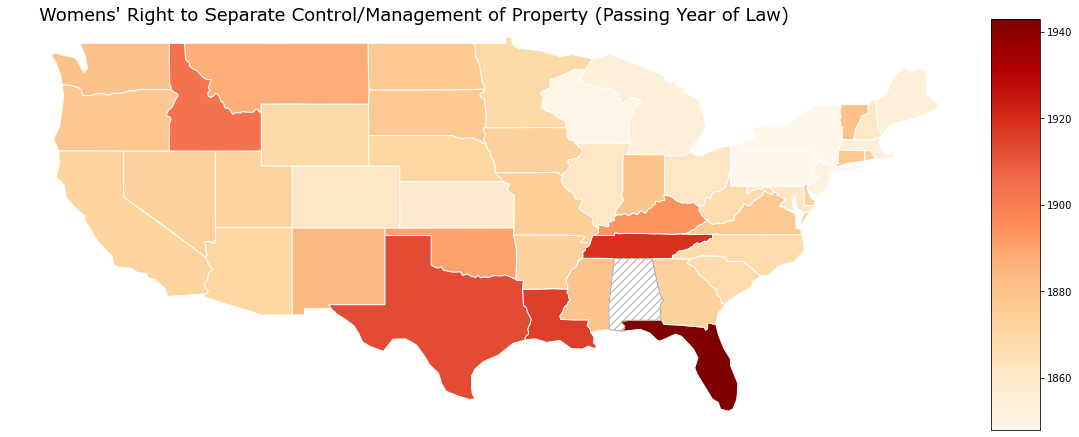

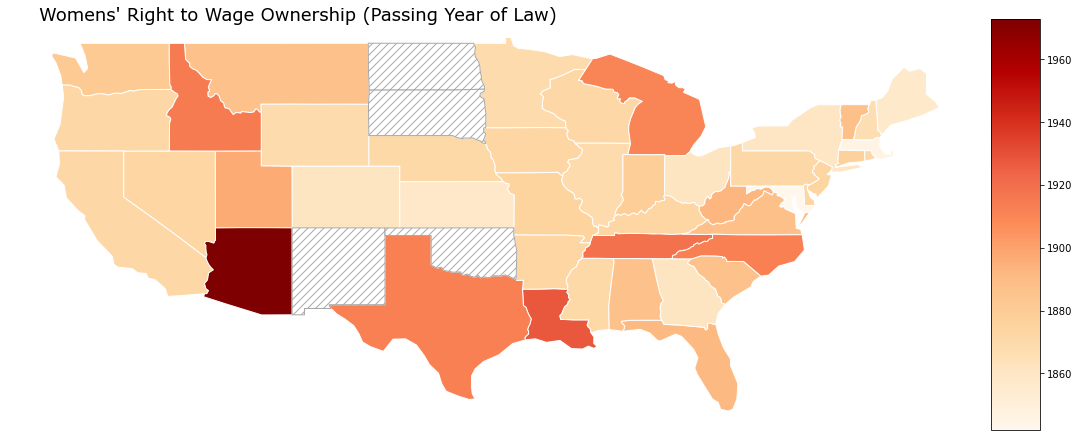

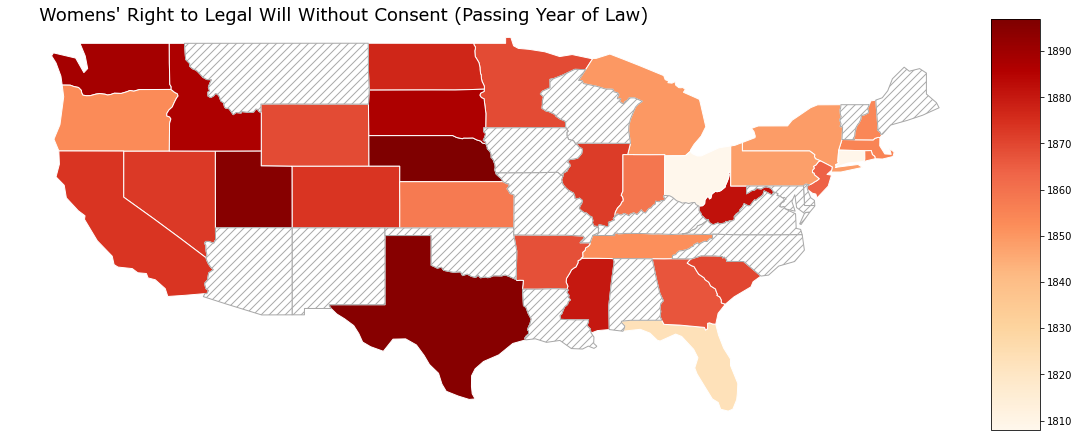

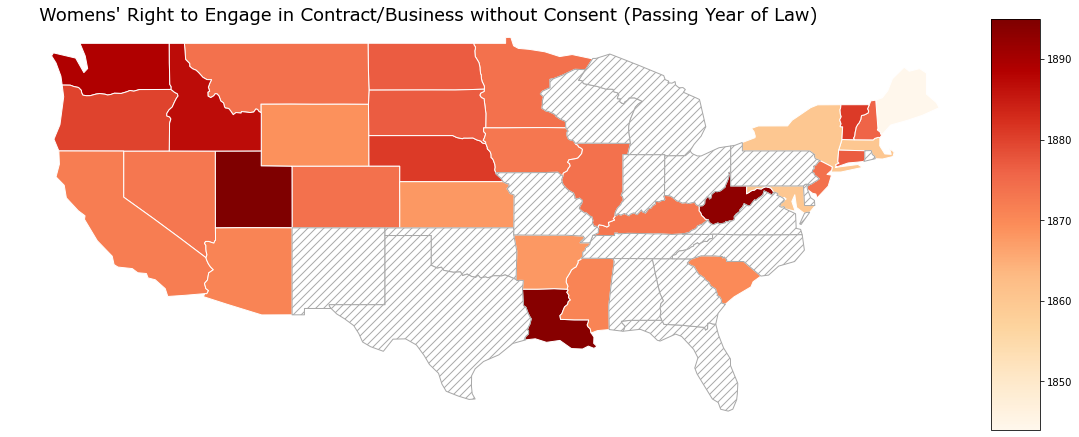

In [31]:
list(map(map_maker, choropleth_config))